In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

plt.rcParams['figure.figsize'] = 15,12

# Print all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df_train = pd.read_csv(r'C:\Users\Chandan\Downloads\train_oSwQCTC\train.csv')

In [4]:
df_train.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
361335,1001635,P00047242,M,26-35,0,B,1,0,1,5.0,NaN,8322
488518,1003320,P00326842,M,26-35,1,B,1,1,5,8.0,NaN,1776
459039,1004626,P00139942,M,26-35,14,B,4+,0,5,NaN,NaN,3450
1022,1000173,P00117342,M,26-35,0,B,1,1,1,8.0,13.0,11693
536730,1004601,P00184942,M,36-45,14,C,0,0,1,8.0,17.0,19438


In [5]:
from scipy.stats import boxcox

The boxcox() SciPy function implements the Box-Cox method. It takes an argument, called lambda, that controls the type of transform to perform.

Below are some common values for lambda:

lambda = -1. is a reciprocal transform.
x -> 1/x

lambda = -0.5 is a reciprocal square root transform.
x -> 1/sqrt(x)

lambda = 0.0 is a log transform.
x -> log(x)

lambda = 0.5 is a square root transform.
x -> sqrt(x)

lambda = 1.0 is no transform.
x -> x

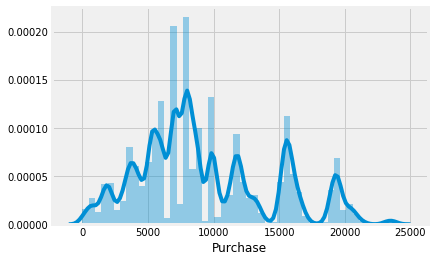

In [6]:
#histogram
sns.distplot(df_train['Purchase'])

In [7]:
# power transform
data = boxcox(df_train['Purchase'],0.5 )

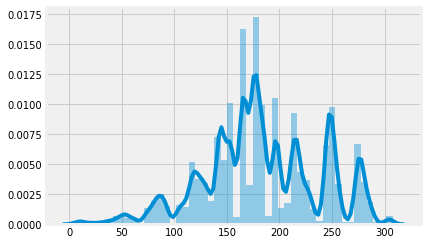

In [8]:
#histogram
sns.distplot(data)

In [9]:
#skewness and kurtosis
print("Skewness: %f" % pd.DataFrame(data).skew())
print("Kurtosis: %f" % pd.DataFrame(data).kurt())

Skewness: -0.139588
Kurtosis: -0.103687


There are stills lots of bumps in the distribution plot, let us see, if we can reduce its effect by using diffrent alogrithms for best predictions

### Product_Category_1 (Vs) Gender 

#### Chi-Squred Test

If we want to determine the statistical significance of two independent categorical groups of data, this is where the Chi-squared test for independence is useful.

In [10]:
contingency_table = pd.crosstab(df_train['Gender'],df_train['Product_Category_1'],margins = True)

In [11]:
contingency_table

Product_Category_1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,All
Gender,,,,,,,,,,,,,,,,,,,,,
F,24831,5658,6006,3639,41961,4559,943,33558,70,1162,4739,1532,1462,623,1046,2402,62,382,451,723,135809
M,115547,18206,14207,8114,108972,15907,2778,80367,340,3963,19548,2415,4087,900,5244,7426,516,2743,1152,1827,414259
All,140378,23864,20213,11753,150933,20466,3721,113925,410,5125,24287,3947,5549,1523,6290,9828,578,3125,1603,2550,550068


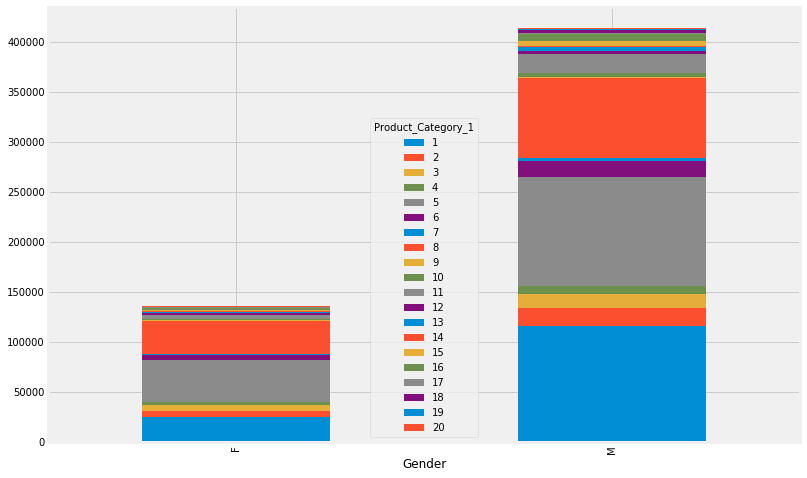

In [12]:
plt.rcParams['figure.figsize'] = (12, 8)

contingency_table.iloc[0:2,0:20].plot(kind='bar', stacked=True)

In [13]:
f_obs = np.array([contingency_table.iloc[0][0:20].values,
                  contingency_table.iloc[1][0:20].values])

In [14]:
from scipy import stats

stats.chi2_contingency(f_obs)[0:3]

(8070.411022236562, 0.0, 19)

#### Conclusions

With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'sex' and the 'Product_Category_1' column. We don't know what this relationship is, but we do know that these two variables are not independent of each other.

### Product_Category_1 (vs) Gender (vs) Purchase

#### Chi-Sqaured Test

In [15]:
contingency_table = pd.crosstab(df_train['Gender'],df_train['Product_Category_1'],df_train['Purchase'].values, aggfunc="mean",margins = True)

In [16]:
contingency_table

Product_Category_1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,All
Gender,,,,,,,,,,,,,,,,,,,,,
F,13597.162619,11407.496819,10262.656677,2454.851882,6307.239532,15596.428164,16394.853659,7499.924787,15724.314286,19692.076592,4676.371808,1422.909269,733.846785,13747.362761,14695.326960,14681.491257,9846.403226,2848.607330,37.676275,371.564315,8734.565765
M,13608.164721,11203.590520,10026.550081,2273.512694,6214.230729,15907.851009,16355.789777,7498.554419,15498.888235,19670.731264,4687.425261,1305.154037,718.306092,12722.321111,14797.431350,14793.384056,10209.732558,2990.168793,36.793403,370.052545,9437.526040
All,13606.218596,11251.935384,10096.705734,2329.659491,6240.088178,15838.478550,16365.689600,7498.958078,15537.375610,19675.570927,4685.268456,1350.859894,722.400613,13141.625739,14780.451828,14766.037037,10170.759516,2972.864320,37.041797,370.481176,9263.968713


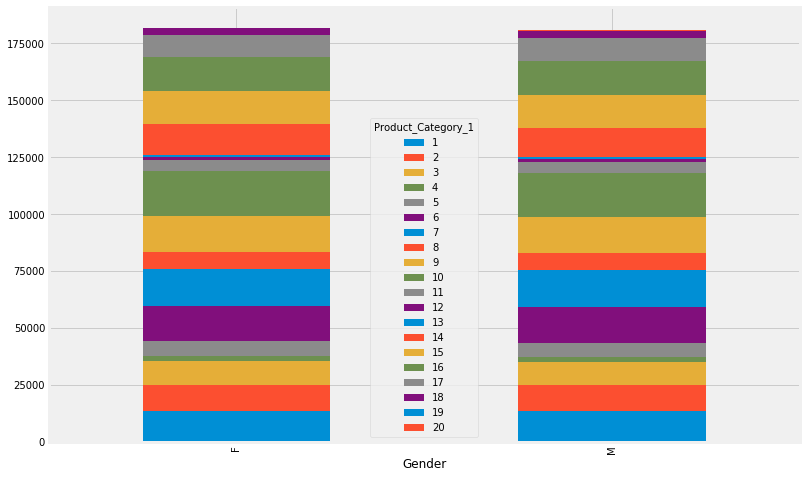

In [17]:
plt.rcParams['figure.figsize'] = (12, 8)

contingency_table.iloc[0:2,0:20].plot(kind='bar', stacked=True)

In [18]:
f_obs = np.array([contingency_table.iloc[0][0:20].values,
                  contingency_table.iloc[1][0:20].values])

In [19]:
from scipy import stats

stats.chi2_contingency(f_obs)[0:3]

(69.36935573776768, 1.1705609555221522e-07, 19)

#### Conclusions

With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'sex' and the 'Product_Category_1' column. We don't know what this relationship is, but we do know that these two variables are not independent of each other.

In [19]:
import scipy

### Gender Vs Purchase

In [20]:
data1 = df_train[df_train['Gender'] == 'M']

In [21]:
data2 = df_train[df_train['Gender'] == 'F']

In [22]:
twosample_results = scipy.stats.ttest_ind(data1['Purchase'], data2['Purchase'])

In [23]:
twosample_results

Ttest_indResult(statistic=44.837957934353966, pvalue=0.0)

Gender has a significance on Purchase

####  Marital Status Vs Purchase

In [24]:
data1 = df_train[df_train['Marital_Status'] == 0]

In [25]:
data2 = df_train[df_train['Marital_Status'] == 1]

In [26]:
twosample_results = scipy.stats.ttest_ind(data1['Purchase'], data2['Purchase'])

In [27]:
twosample_results

Ttest_indResult(statistic=0.3436698055440526, pvalue=0.7310947525758316)

Marital_Status has no a significance on Purchase

In [28]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Stay_In_Current_City_Years (vs) Purchase

In [29]:
stats.f_oneway(df_train['Purchase'][df_train['Stay_In_Current_City_Years'] == '1'], 
               df_train['Purchase'][df_train['Stay_In_Current_City_Years'] == '2'], 
               df_train['Purchase'][df_train['Stay_In_Current_City_Years'] == '3'], 
               df_train['Purchase'][df_train['Stay_In_Current_City_Years'] == '4+'] 
             )

F_onewayResult(statistic=4.501016338101479, pvalue=0.003666206671660853)

In [30]:
results = ols('Purchase ~ C(Stay_In_Current_City_Years)', data=df_train).fit()

In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.383
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           1.40e-07
Time:                        19:16:12   Log-Likelihood:            -5.4681e+06
No. Observations:              550068   AIC:                         1.094e+07
Df Residuals:                  550063   BIC:                         1.094e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            9180.0751     18.415    498.507      0.000    9143.982    9216.168
C(Stay_In_Current_City_Years)[T.1]     70.0708     21.663      3.235      0.001      27.612     112.530
C(Stay_In_Current_City_Years)[T.2]    140.3547     24.225      5.794      0.000      92.874     187.835
C(Stay_In_Current_City_Years)[T.3]    106.8290     24.574      4.347      0.000      58.664     154.994
C(Stay_In_Current_City_Years)[T.4+]    95.5237     25.237      3.785      0.000      46.060     144.987
==============================================================================
Omnibus:                    32195.492   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35632.517
Skew:                           0.600   Prob(JB):                         0.00
Kurtosis:                       2.662   Cond. No.                         7.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
stats.levene(df_train['Purchase'][df_train['Stay_In_Current_City_Years'] == '1'], 
            df_train['Purchase'][df_train['Stay_In_Current_City_Years'] == '2'], 
            df_train['Purchase'][df_train['Stay_In_Current_City_Years'] == '3'], 
            df_train['Purchase'][df_train['Stay_In_Current_City_Years'] == '4+'])

LeveneResult(statistic=3.2281622601740763, pvalue=0.0214484626907273)

There is no equal variance between the groups

In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df_train['Purchase'], df_train['Stay_In_Current_City_Years'])
mc_results = mc.tukeyhsd()

In [36]:
print(mc_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     0      1  70.0708 0.0107   10.9792 129.1624   True
     0      2 140.3547  0.001   74.2742 206.4352   True
     0      3  106.829  0.001   39.7961 173.8619   True
     0     4+  95.5237 0.0014   26.6838 164.3637   True
     1      2  70.2839 0.0028   17.2563 123.3115   True
     1      3  36.7582 0.3453  -17.4516   90.968  False
     1     4+  25.4529 0.7071   -30.976  81.8819  False
     2      3 -33.5257 0.5649  -95.2794   28.228  False
     2     4+ -44.8309 0.3069 -108.5416  18.8798  False
     3     4+ -11.3052    0.9  -76.0032  53.3927  False
-------------------------------------------------------


In [38]:
stats.ttest_ind(df_train['Purchase'][df_train['Stay_In_Current_City_Years'] == '1'], df_train['Purchase'][df_train['Stay_In_Current_City_Years'] == '2'])

Ttest_indResult(statistic=-3.607913133473746, pvalue=0.0003087206569773086)

In [39]:
stats.ttest_ind(df_train['Purchase'][df_train['Stay_In_Current_City_Years'] == '1'], df_train['Purchase'][df_train['Stay_In_Current_City_Years'] == '3'])

Ttest_indResult(statistic=-1.8488057263725304, pvalue=0.06448689049223695)